# **Install Important Libraries**

In [ ]:
pip install geodatasets

In [ ]:
!pip install geopandas fiona shapely pyproj rtree

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.6/56.6 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 87.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 541.1/541.1 kB 31.0 MB/s eta 0:00:00


# **Spatial Data**

In [ ]:
import geopandas as gpd
from google.colab import files
uploaded = files.upload()
world = gpd.read_file('ne_110m_admin_0_countries.shp')

Saving ne_110m_admin_0_countries.cpg to ne_110m_admin_0_countries (1).cpg
Saving ne_110m_admin_0_countries.dbf to ne_110m_admin_0_countries (1).dbf
Saving ne_110m_admin_0_countries.prj to ne_110m_admin_0_countries (1).prj
Saving ne_110m_admin_0_countries.shp to ne_110m_admin_0_countries (1).shp
Saving ne_110m_admin_0_countries.shx to ne_110m_admin_0_countries (1).shx


# **Climate Variables Data**

In [ ]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
H = pd.read_excel('Average Humidity.xlsx')
T = pd.read_excel('Average Temperature.xlsx')
W = pd.read_excel('Average Windspeed.xlsx')
R = pd.read_excel('Average Rainfall.xlsx')

Saving Average Humidity.xlsx to Average Humidity (4).xlsx
Saving Average Rainfall.xlsx to Average Rainfall (4).xlsx
Saving Average Temperature.xlsx to Average Temperature (4).xlsx
Saving Average Windspeed.xlsx to Average Windspeed (4).xlsx


# **Temperature**

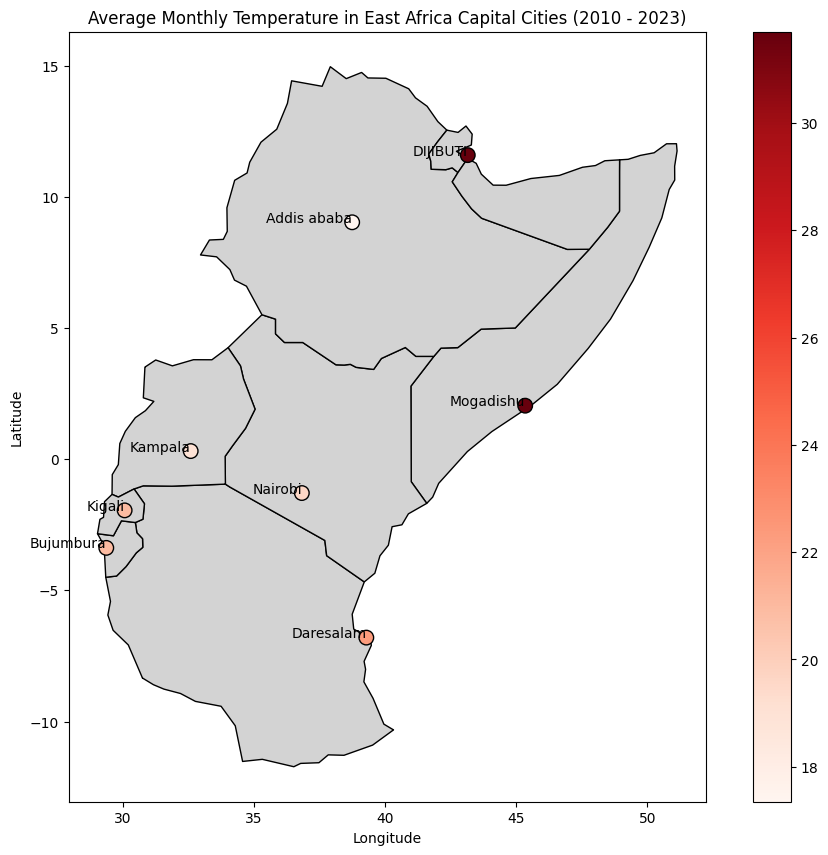

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset
#df = pd.read_excel('Avg monthly Temp.xlsx')

# Dictionary for city coordinates (latitude, longitude)
city_coords = {
    "Addis ababa": (9.03, 38.74),
    "Daresalam": (-6.8, 39.28),
    "Bujumbura": (-3.38, 29.36),
    "Kigali": (-1.95, 30.06),
    "Kampala": (0.31, 32.58),
    "Mogadishu": (2.04, 45.34),
    "Nairobi": (-1.29, 36.82),
    "DIJIBUTI": (11.59, 43.15)
}

# Compute the average temperature for each city
avg_temps = T.iloc[:, 1:].mean().to_dict()

# Create a GeoDataFrame for temperature data
gdf = gpd.GeoDataFrame(
    {"City": avg_temps.keys(), "AvgTemp": avg_temps.values()},
    geometry=gpd.points_from_xy(
        [city_coords[city][1] for city in avg_temps.keys()],  # Longitude
        [city_coords[city][0] for city in avg_temps.keys()]   # Latitude
    ),
    crs="EPSG:4326"
)

# Load world map
world = gpd.read_file('ne_110m_admin_0_countries.shp')

# Focus on East Africa and include Somalia and Tanzania
east_africa = ["Ethiopia", "Tanzania", "Burundi", "Rwanda", "Uganda", "Somalia","Somaliland", "Kenya", "Djibouti","Zanzibar", "Tanganyika", "Tanzania","United Republic of Tanzania"]

# Plot map
fig, ax = plt.subplots(figsize=(12, 10))

# Plot all countries in East Africa (including Somalia and Tanzania)
world[world["ADMIN"].isin(east_africa)].plot(ax=ax, color="lightgrey", edgecolor="black")


# Plot temperature points with an improved colormap ("Reds")
gdf.plot(ax=ax, column="AvgTemp", cmap="Reds", markersize=110, edgecolor="black", legend=True)

# Add labels
for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf["City"]):
    ax.text(x, y, label, fontsize=10, ha="right")

# Add title and labels
ax.set_title("Average Monthly Temperature in East Africa Capital Cities (2010 - 2023)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.show()


# **Rainfall**

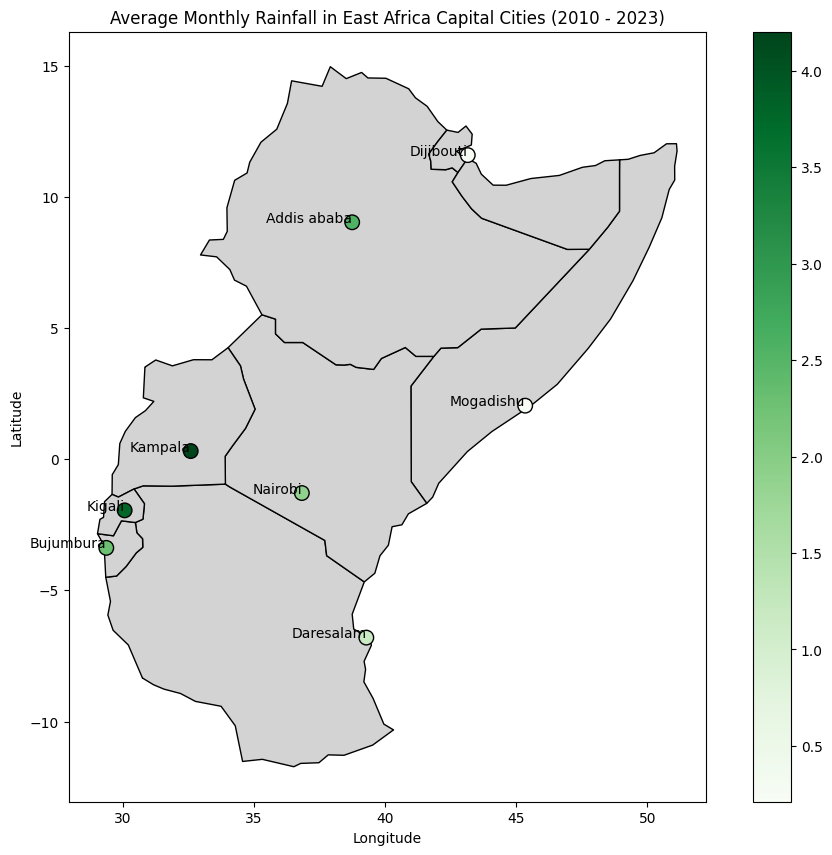

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset (Assuming ba is the new dataset instead of df)
#ba = pd.read_excel('Average monthly Rainfall.xlsx')  # Update with your new file

# Dictionary for city coordinates (latitude, longitude)
city_coords = {
    "Addis ababa": (9.03, 38.74),
    "Daresalam": (-6.8, 39.28),
    "Bujumbura": (-3.38, 29.36),
    "Kigali": (-1.95, 30.06),
    "Kampala": (0.31, 32.58),
    "Mogadishu": (2.04, 45.34),
    "Nairobi": (-1.29, 36.82),
    "Dijibouti": (11.59, 43.15)  # Corrected the city name here
}

# Compute the average rainfall for each city from the new dataset (ba)
avg_rainfall = R.iloc[:, 1:].mean().to_dict()

# Create a GeoDataFrame for rainfall data
gdf = gpd.GeoDataFrame(
    {"City": avg_rainfall.keys(), "AvgRainfall": avg_rainfall.values()},
    geometry=gpd.points_from_xy(
        [city_coords[city][1] for city in avg_rainfall.keys()],  # Longitude
        [city_coords[city][0] for city in avg_rainfall.keys()]   # Latitude
    ),
    crs="EPSG:4326"
)

# Load world map
world = gpd.read_file('ne_110m_admin_0_countries.shp')

# Focus on East Africa and include Somalia and Tanzania
east_africa = ["Ethiopia", "Tanzania", "Burundi", "Rwanda", "Uganda", "Somalia", "Somaliland", "Kenya", "Djibouti", "Zanzibar", "Tanganyika", "Tanzania", "United Republic of Tanzania"]

# Plot map
fig, ax = plt.subplots(figsize=(12, 10))

# Plot all countries in East Africa (including Somalia and Tanzania)
world[world["ADMIN"].isin(east_africa)].plot(ax=ax, color="lightgrey", edgecolor="black")

# Plot rainfall points with an improved colormap ("Greens")
gdf.plot(ax=ax, column="AvgRainfall", cmap="Greens", markersize=110, edgecolor="black", legend=True)

# Add labels
for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf["City"]):
    ax.text(x, y, label, fontsize=10, ha="right")

# Add title and labels
ax.set_title("Average Monthly Rainfall in East Africa Capital Cities (2010 - 2023)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.show()


# **Humidity**

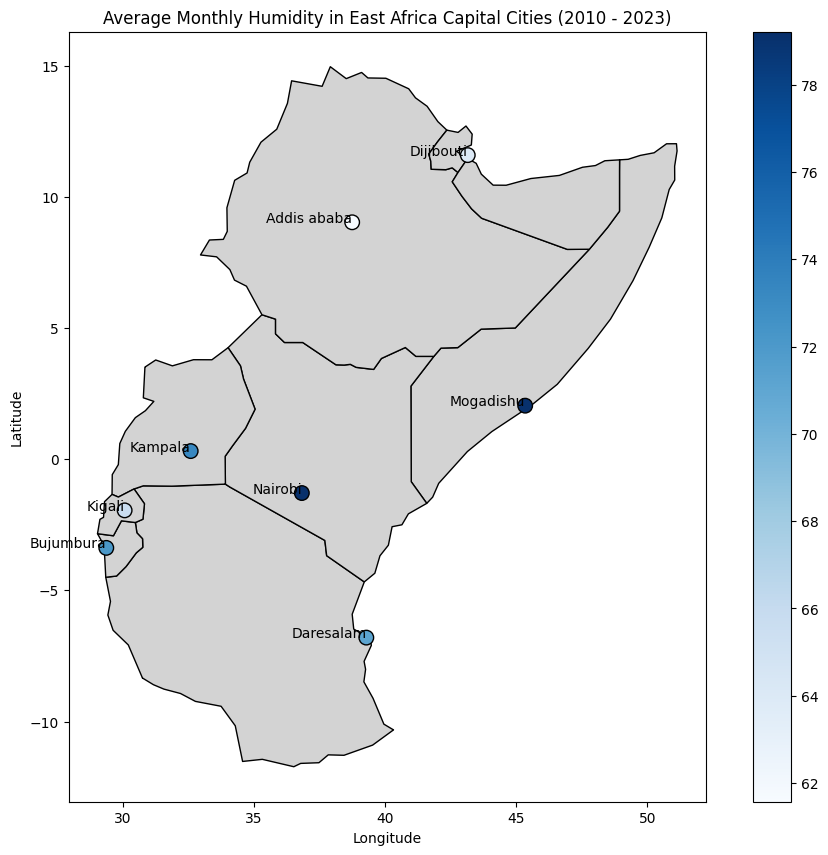

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset (Assuming 's.xlsx' is the new dataset instead of ba)
#s = pd.read_excel('Average monthly Humidity.xlsx')  # Update with your new file for humidity

# Dictionary for city coordinates (latitude, longitude)
city_coords = {
    "Addis ababa": (9.03, 38.74),
    "Daresalam": (-6.8, 39.28),
    "Bujumbura": (-3.38, 29.36),
    "Kigali": (-1.95, 30.06),
    "Kampala": (0.31, 32.58),
    "Mogadishu": (2.04, 45.34),
    "Nairobi": (-1.29, 36.82),
    "Dijibouti": (11.59, 43.15)  # Corrected the city name here
}

# Compute the average humidity for each city from the new dataset (s)
avg_humidity = H.iloc[:, 1:].mean().to_dict()

# Create a GeoDataFrame for humidity data
gdf = gpd.GeoDataFrame(
    {"City": avg_humidity.keys(), "AvgHumidity": avg_humidity.values()},
    geometry=gpd.points_from_xy(
        [city_coords[city][1] for city in avg_humidity.keys()],  # Longitude
        [city_coords[city][0] for city in avg_humidity.keys()]   # Latitude
    ),
    crs="EPSG:4326"
)

# Load world map
world = gpd.read_file('ne_110m_admin_0_countries.shp')

# Focus on East Africa and include Somalia and Tanzania
east_africa = ["Ethiopia", "Tanzania", "Burundi", "Rwanda", "Uganda", "Somalia", "Somaliland", "Kenya", "Djibouti", "Zanzibar", "Tanganyika", "Tanzania", "United Republic of Tanzania"]

# Plot map
fig, ax = plt.subplots(figsize=(12, 10))

# Plot all countries in East Africa (including Somalia and Tanzania)
world[world["ADMIN"].isin(east_africa)].plot(ax=ax, color="lightgrey", edgecolor="black")

# Plot humidity points with a blue color scale ("Blues")
gdf.plot(ax=ax, column="AvgHumidity", cmap="Blues", markersize=110, edgecolor="black", legend=True)

# Add labels
for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf["City"]):
    ax.text(x, y, label, fontsize=10, ha="right")

# Add title and labels
ax.set_title("Average Monthly Humidity in East Africa Capital Cities (2010 - 2023)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.show()


# **WindSpeed**

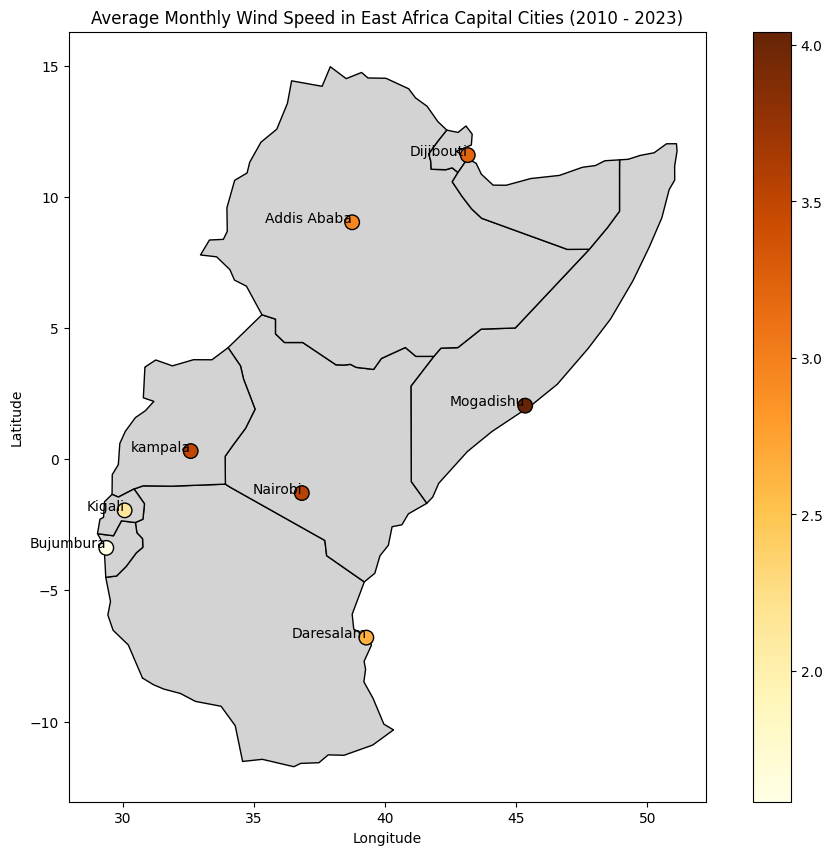

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset (Assuming 'w.xlsx' is the new dataset for wind speed)
#w = pd.read_excel('Average monthly Wind speed EA.xlsx')  # Update with your new file for wind speed

# Dictionary for city coordinates (latitude, longitude)
city_coords = {
    "Addis Ababa": (9.03, 38.74),
    "Daresalam": (-6.8, 39.28),
    "Bujumbura": (-3.38, 29.36),
    "Kigali": (-1.95, 30.06),
    "kampala": (0.31, 32.58),
    "Mogadishu": (2.04, 45.34),
    "Nairobi": (-1.29, 36.82),
    "Dijibouti": (11.59, 43.15)  # Corrected the city name here
}

# Compute the average wind speed for each city from the new dataset (w)
avg_wind_speed = W.iloc[:, 1:].mean().to_dict()

# Create a GeoDataFrame for wind speed data
gdf = gpd.GeoDataFrame(
    {"City": avg_wind_speed.keys(), "AvgWindSpeed": avg_wind_speed.values()},
    geometry=gpd.points_from_xy(
        [city_coords[city][1] for city in avg_wind_speed.keys()],  # Longitude
        [city_coords[city][0] for city in avg_wind_speed.keys()]   # Latitude
    ),
    crs="EPSG:4326"
)

# Load world map
world = gpd.read_file('ne_110m_admin_0_countries.shp')

# Focus on East Africa and include Somalia and Tanzania
east_africa = ["Ethiopia", "Tanzania", "Burundi", "Rwanda", "Uganda", "Somalia", "Somaliland", "Kenya", "Djibouti", "Zanzibar", "Tanganyika", "Tanzania", "United Republic of Tanzania"]

# Plot map
fig, ax = plt.subplots(figsize=(12, 10))

# Plot all countries in East Africa (including Somalia and Tanzania)
world[world["ADMIN"].isin(east_africa)].plot(ax=ax, color="lightgrey", edgecolor="black")

# Plot wind speed points with a yellow color scale ("YlOrBr")
gdf.plot(ax=ax, column="AvgWindSpeed", cmap="YlOrBr", markersize=110, edgecolor="black", legend=True)

# Add labels
for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf["City"]):
    ax.text(x, y, label, fontsize=10, ha="right")

# Add title and labels
ax.set_title("Average Monthly Wind Speed in East Africa Capital Cities (2010 - 2023)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.show()
